In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    gpu = gpus[-1]
    tf.config.experimental.set_memory_growth(gpu, True)

2024-04-17 16:58:56.386442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 16:58:56.386635: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 16:58:56.400218: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-17 16:58:56.425188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 16:58:58.468147: I exter

In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

train_data = np.array(train_data, dtype=object)
test_data = np.array(test_data, dtype=object)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2024-04-17 16:59:50.171180: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 16:59:50.171486: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 16:59:50.171679: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 16:59:51.272324: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 16:59:51.273397: I external/local_xla/xla/stream_executor

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

2024-04-17 17:00:43.344979: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.
2024-04-17 17:00:49.540782: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20


2024-04-17 17:00:50.852587: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2024-04-17 17:00:50.854420: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2024-04-17 17:00:50.857143: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2024-04-17 17:00:52.409769: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc2446ebcb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-17 17:00:52.409826: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2024-04-17 17:00:52.441934: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-17 17:

30/30 [==============================] - 15s 415ms/step - loss: 0.5310 - accuracy: 0.7635 - val_loss: 0.3969 - val_accuracy: 0.8620
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3219 - accuracy: 0.8956 - val_loss: 0.3167 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2392 - accuracy: 0.9207 - val_loss: 0.2798 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.1922 - accuracy: 0.9367 - val_loss: 0.2966 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1621 - accuracy: 0.9472 - val_loss: 0.2788 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1380 - accuracy: 0.9552 - val_loss: 0.2868 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1170 - accuracy: 0.9635 - val_loss: 0.3025 - val_accuracy: 0.8841
Epoch 8/20
30/30 [====

In [9]:
history_dict = history.history

In [10]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

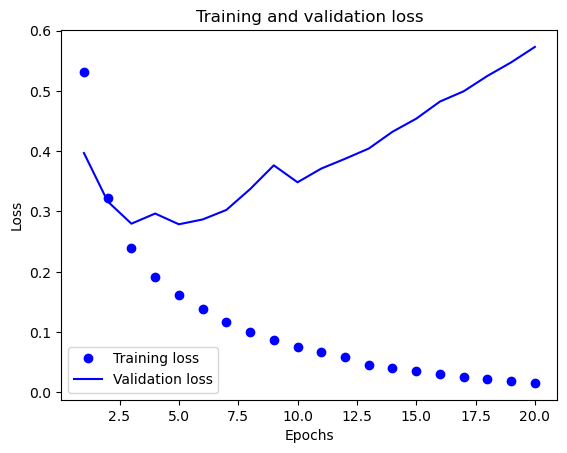

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

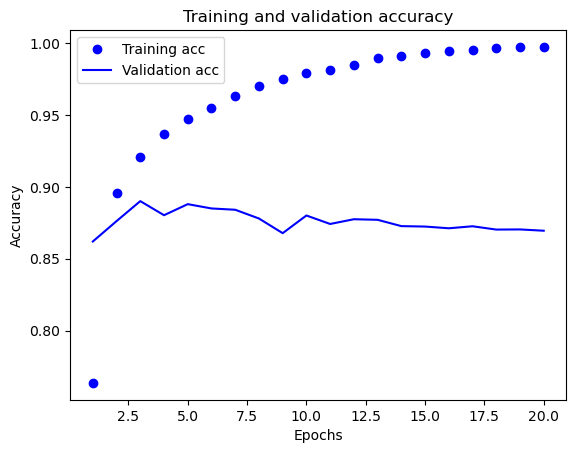

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [16]:
model.fit(x_train, y_train, epochs=4, batch_size=128)

Epoch 1/4
196/196 [==============================] - 4s 14ms/step - loss: 0.3531 - accuracy: 0.8549
Epoch 2/4
196/196 [==============================] - 3s 14ms/step - loss: 0.2108 - accuracy: 0.9205
Epoch 3/4
196/196 [==============================] - 3s 15ms/step - loss: 0.1691 - accuracy: 0.9380
Epoch 4/4
196/196 [==============================] - 3s 15ms/step - loss: 0.1413 - accuracy: 0.9476


In [17]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 5s 6ms/step - loss: 0.3525 - accuracy: 0.8714


In [18]:
results

[0.352477490901947, 0.8714399933815002]